In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import math
%matplotlib inline

Сгенерируем выборку объёма 1000 из хи-квадрат распределения с параметром 3
Мат. ожидание - 3
Дисперсия - 6

In [2]:
ex_rv = sts.chi2(3)
sample = ex_rv.rvs(1000)

гистограмма выборки и теоретическая плотность распределения

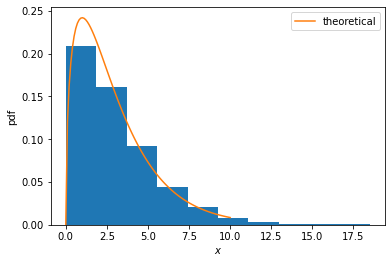

In [3]:
plt.hist(sample, density=True)
plt.ylabel('pdf')
plt.xlabel('$x$')
x = np.linspace(0,10,100)
pdf = ex_rv.pdf(x)
plt.plot(x, pdf, label='theoretical')
plt.legend()


1000 выборк объема n = 5, 10, 50

In [4]:
sample_5 = ex_rv.rvs(5)
for _ in range(1,1000):
    n_sample = ex_rv.rvs(5)
    sample_5 = np.vstack([sample_5, n_sample])

sample_10 = ex_rv.rvs(10)
for _ in range(1,1000):
    n_sample = ex_rv.rvs(10)
    sample_10 = np.vstack([sample_10, n_sample])

sample_50 = ex_rv.rvs(50)
for _ in range(1,1000):
    n_sample = ex_rv.rvs(50)
    sample_50 = np.vstack([sample_50, n_sample])


Согласно ЦПТ, выборочное среднее имеет нормальное распределение N(m,d/n), где m-теоретическое мат.ожидание исходной случайной велечины. d - дисперсия

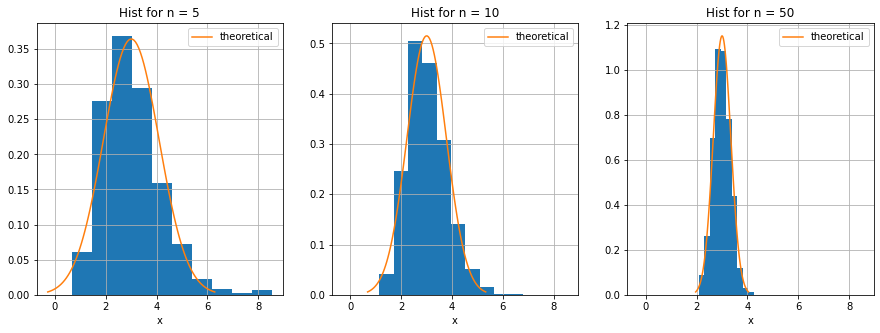

In [5]:
samples = [sample_5, sample_10, sample_50]
fig, ax = plt.subplots(ncols=3, figsize=(15,5), sharex=True)
for i,sampl in  enumerate(samples):
    ax[i].hist(np.mean(sampl,axis=1),density = True)
    ax[i].grid()
    ax[i].set_xlabel("x")
    ax[i].set_title(f"Hist for n = {len(sampl[0])}")
    mu = 3 ##теоретическое мат. ожидание 
    variance = 2*3/len(sampl[0]) # теоретическая дисперсия 
    sigma = math.sqrt(variance)
    x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
    ax[i].plot(x, sts.norm.pdf(x, mu, sigma), label='theoretical') 
    ax[i].legend()


    
   



### Вывод


В ходе работы оценил распределение выборочного среднего случайной величины хи-квадрат при 3x объёмах выборок(n = 5,10,50). По графикам выше видно, выборочное среднее для хи-квадрат, действительно, имеет нормальное распределение N(m,d/n). Причем, при увеличении n, точность увеличивается.